# Frame the Problem
             

##                                   To predict the accuracy of team1's winning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Obtain the data

In [2]:
deliveries=pd.read_csv('deliveries.csv')
matches=pd.read_csv('matches.csv')

In [3]:
matches.sort_values(['season','id'],inplace=True)

# Analysis of Data 

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
59,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
60,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
61,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
62,63,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
63,64,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


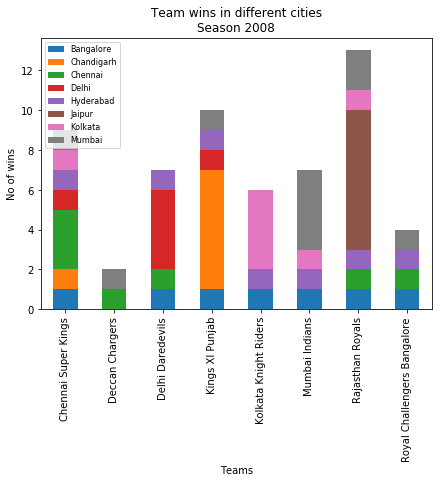

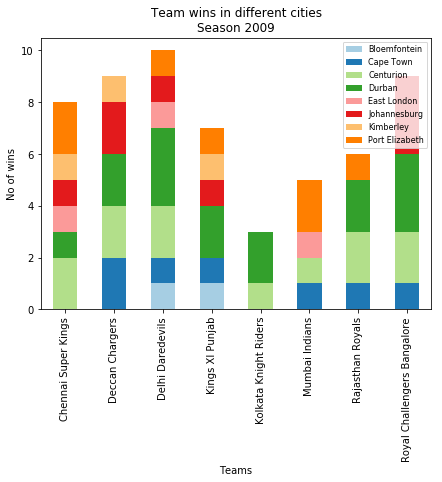

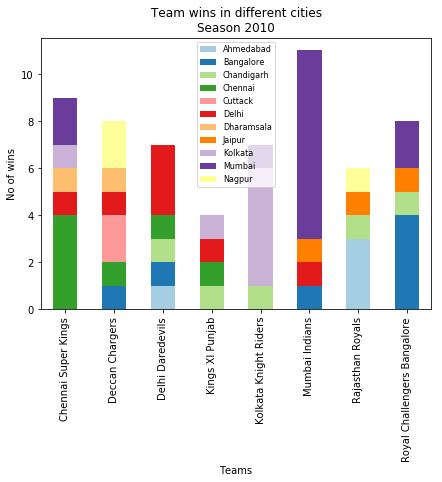

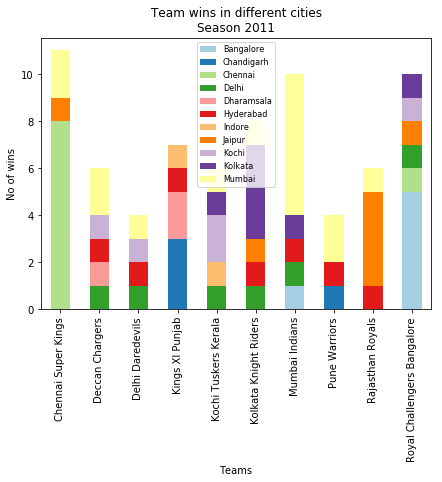

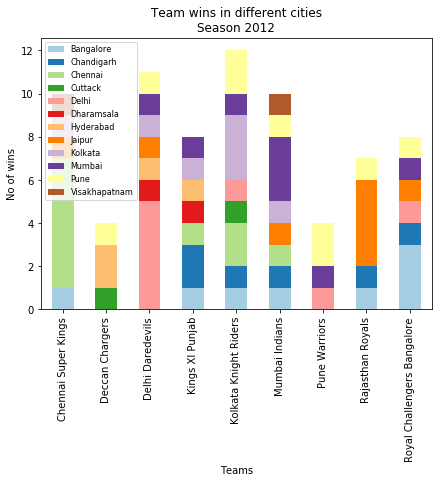

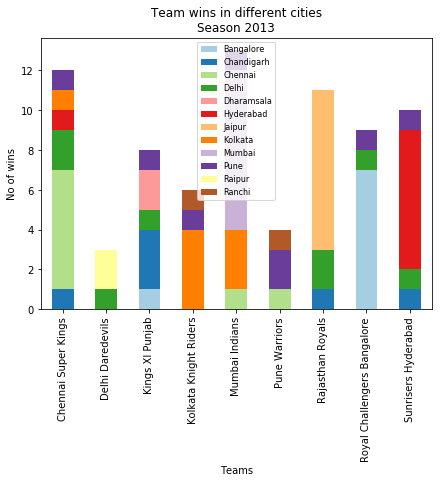

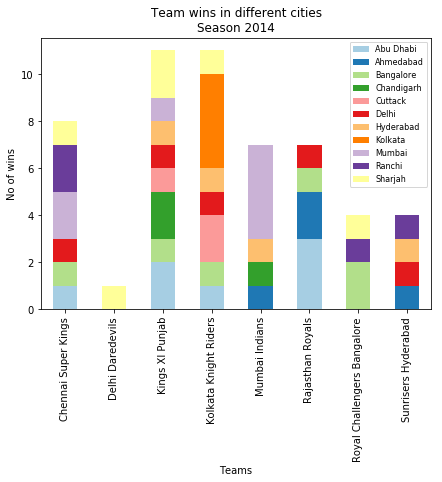

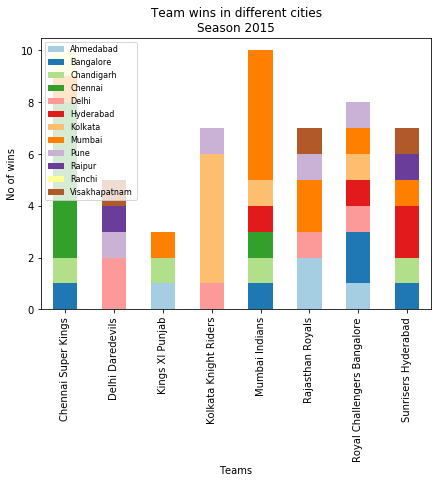

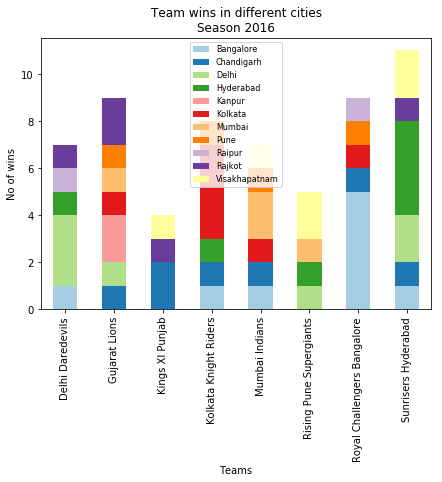

In [5]:
x, y = 2008, 2017
while x < y:
    wins_percity = matches[matches['season'] == x].groupby(['winner', 'city'])['id'].count().unstack()
    plot = wins_percity.plot(kind='bar', stacked=True, title="Team wins in different cities\nSeason "+str(x), figsize=(7, 5))
    sns.set_palette("Paired", len(matches['city'].unique()))
    plot.set_xlabel("Teams")
    plot.set_ylabel("No of wins")
    plot.legend(loc='best', prop={'size':8})
    x+=1

# Feature Engineering

In [6]:
matches.index=np.arange(0,len(matches))


In [7]:
def changeName(cols):
    if cols=='Rising Pune Supergiant':
        return 'Rising Pune Supergiants'
    
    else:
        
        return cols

matches['team1']=matches['team1'].apply(changeName)
matches['team2']=matches['team2'].apply(changeName)
matches['toss_winner']=matches['toss_winner'].apply(changeName)
matches['winner']=matches['winner'].apply(changeName)

In [8]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,63,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,64,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [9]:
ret=deliveries.groupby(['match_id','inning','over']).sum()[['total_runs']]

In [10]:
team1l=[]
team2l=[]

In [11]:
for i in range (0,len(matches)):
    tc=[0,0]
    wc=[0,0]
    present=matches.loc[i]
    for j in range(i-1,-2,-1):
        if (tc[0]==5 and tc[1]==5) or j==-1:
            team1l.append(wc[0])
            team2l.append(wc[1])
            break
        
        else:
            previous=matches.loc[j]
            if (previous['team1']==present['team1'] or previous['team2']== present['team1'] ) and tc[0]<5:
                tc[0]+=1
                if (previous['winner']==present['team1']) and wc[0]<5 :
                    wc[0]+=1
            if previous['team1']==present['team2'] or previous['team2']== present['team2'] and tc[1]<=5:
                tc[1]+=1
                if (previous['winner']==present['team2']) and wc[1]<5:
                    wc[1]+=1
                    
        
        
        

In [12]:
d=pd.Series(data=team1l,name='team1_form')
matches=pd.concat([matches,d],axis=1)
d=pd.Series(data=team2l,name='team2_form')
matches=pd.concat([matches,d],axis=1)

In [15]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,team1_form,team2_form
0,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,0,0
1,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,0,0
2,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN,0,0
3,63,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN,0,0
4,64,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN,0,1
5,65,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN,0,0
6,66,2008,Hyderabad,2008-04-22,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Delhi Daredevils,0,9,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba,NaN,0,1
7,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN,1,0
8,68,2008,Hyderabad,2008-04-24,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,MR Benson,NaN,0,1
9,69,2008,Chandigarh,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba,NaN,0,0


In [16]:
venue_bat=[]
venue_bowl=[]
for i in range (0,len(matches)):
    
    wc=[0,0]
    present=matches.loc[i]
    for j in range(i-1,-2,-1):
        if  j==-1:
            if((wc[0]+wc[1])!=0):
                
                venue_bat.append(wc[0])
                venue_bowl.append(wc[1])
            else:
                
                venue_bat.append(wc[0])
                venue_bowl.append(wc[1])
                    
            break
        
        else:
            previous=matches.loc[j]
            if previous['venue']==present['venue']:
                if previous['winner']==previous['team1']:
                    wc[0]+=1
                else:
                    wc[1]+=1
                    
                
            
            
                
d=pd.Series(data=venue_bat,name='venue_bat_win')
matches=pd.concat([matches,d],axis=1)
d=pd.Series(data=venue_bowl,name='venue_bowl_win')
matches=pd.concat([matches,d],axis=1)              
                    

In [17]:
matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,team1_form,team2_form,venue_bat_win,venue_bowl_win
631,55,2017,Delhi,2017-05-14,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,...,0,HV Patel,Feroz Shah Kotla,CK Nandan,C Shamshuddin,NaN,0,5,26,33
632,56,2017,Mumbai,2017-05-16,Rising Pune Supergiants,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,Washington Sundar,Wankhede Stadium,S Ravi,C Shamshuddin,NaN,4,3,28,28
633,57,2017,Bangalore,2017-05-17,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,...,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon,NaN,3,1,27,37
634,58,2017,Bangalore,2017-05-19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,...,6,KV Sharma,M Chinnaswamy Stadium,NJ Llong,Nitin Menon,NaN,2,2,27,38
635,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,normal,0,...,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN,2,4,18,30


In [18]:
team1h=[]
team2h=[]

In [19]:
for i in range (0,len(matches)):
    
    wc=[0,0]
    present=matches.loc[i]
    for j in range(i-1,-2,-1):
        if  j==-1:
            team1h.append(wc[0])
            team2h.append(wc[1])
            break
        
        else:
            previous=matches.loc[j]
            if previous['team1']==present['team1'] and previous['team2']==present['team2']:
                if previous['winner']==present['team1']:
                    wc[0]+=1
                else:
                    wc[1]+=1
            elif previous['team1']==present['team2'] and previous['team2']==present['team1']:
                if previous['winner']==present['team1']:
                    wc[0]+=1
                else:
                    wc[1]+=1
            
            
            
                
                
                    

In [20]:
d=pd.Series(data=team1h,name='team1_head')
matches=pd.concat([matches,d],axis=1)
d=pd.Series(data=team2h,name='team2_head')
matches=pd.concat([matches,d],axis=1)

In [21]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,venue,umpire1,umpire2,umpire3,team1_form,team2_form,venue_bat_win,venue_bowl_win,team1_head,team2_head
0,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,0,0,0,0,0,0
1,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,...,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,0,0,0,0,0,0
2,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,...,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN,0,0,0,0,0,0
3,63,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,...,Wankhede Stadium,SJ Davis,DJ Harper,NaN,0,0,0,0,0,0
4,64,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,...,Eden Gardens,BF Bowden,K Hariharan,NaN,0,1,0,0,0,0
5,65,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,...,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN,0,0,0,0,0,0
6,66,2008,Hyderabad,2008-04-22,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,...,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba,NaN,0,1,0,0,0,0
7,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,...,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN,1,0,0,0,0,0
8,68,2008,Hyderabad,2008-04-24,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,normal,0,...,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,MR Benson,NaN,0,1,0,1,0,0
9,69,2008,Chandigarh,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,...,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba,NaN,0,0,1,0,0,0


In [22]:
cities={'Sunrisers Hyderabad':['Hyderabad'],'Mumbai Indians':['Mumbai'],'Gujarat Lions':['Rajkot','Kanpur'],'Rising Pune Supergiants':['Pune'],'Royal Challengers Bangalore':['Bangalore'],'Kolkata Knight Riders':['Kolkata'],'Delhi Daredevils':['Delhi'],
 'Kings XI Punjab':['Indore','Chandigarh','Dharamsala'],'Chennai Super Kings':['Chennai','Ranchi'],'Rajasthan Royals':['Jaipur','Ahmedabad'],'Deccan Chargers':['Hyderabad','Nagpur'],'Kochi Tuskers Kerala':['Kochi'],'Pune Warriors':['Pune']}

In [23]:
def isHomeGround(cols):
    #df[['team1_is_home','team2_is_home']]=np.NaN
    if cols['city'] in cities[cols['team1']]:
        return 1
    
    else:
        return 0

matches['team1_is_home']=matches[['city','team1']].apply(isHomeGround,axis=1)

In [24]:
matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,umpire1,umpire2,umpire3,team1_form,team2_form,venue_bat_win,venue_bowl_win,team1_head,team2_head,team1_is_home
631,55,2017,Delhi,2017-05-14,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,...,CK Nandan,C Shamshuddin,NaN,0,5,26,33,11,7,0
632,56,2017,Mumbai,2017-05-16,Rising Pune Supergiants,Mumbai Indians,Mumbai Indians,field,normal,0,...,S Ravi,C Shamshuddin,NaN,4,3,28,28,3,1,0
633,57,2017,Bangalore,2017-05-17,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,...,AK Chaudhary,Nitin Menon,NaN,3,1,27,37,4,7,0
634,58,2017,Bangalore,2017-05-19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,...,NJ Llong,Nitin Menon,NaN,2,2,27,38,5,15,0
635,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,normal,0,...,NJ Llong,S Ravi,NaN,2,4,18,30,1,4,0


In [25]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [26]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 0 to 635
Data columns (total 25 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
team1_form         636 non-null int64
team2_form         636 non-null int64
venue_bat_win      636 non-null int64
venue_bowl_win     636 non-null int64
team1_head         636 non-null int64
team2_hea

In [27]:
matches.drop(['dl_applied','win_by_runs','win_by_wickets','player_of_match','umpire1','umpire2','umpire3'],axis=1,inplace=True)

In [28]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,venue,team1_form,team2_form,venue_bat_win,venue_bowl_win,team1_head,team2_head,team1_is_home
0,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,M Chinnaswamy Stadium,0,0,0,0,0,0,0
1,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",0,0,0,0,0,0,0
2,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,Delhi Daredevils,Feroz Shah Kotla,0,0,0,0,0,0,0
3,63,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,Royal Challengers Bangalore,Wankhede Stadium,0,0,0,0,0,0,1
4,64,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,Kolkata Knight Riders,Eden Gardens,0,1,0,0,0,0,0


In [29]:
team1_v=[]
team2_v=[]

In [30]:
for i in range (0,len(matches)):
    
    wc=[0,0]
    present=matches.loc[i]
    for j in range(i-1,-2,-1):
        if  j==-1:
            team1_v.append(wc[0])
            team2_v.append(wc[1])
            break
        
        else:
            previous=matches.loc[j]
            if previous['venue']==present['venue'] :
                if previous['winner']==present['team1']:
                    wc[0]+=1
                elif previous['winner']==present['team2']:
                    wc[1]+=1

                

In [31]:
d=pd.Series(data=team1_v,name='team1_wins_venue')
matches=pd.concat([matches,d],axis=1)
d=pd.Series(data=team2_v,name='team2_wins_venue')
matches=pd.concat([matches,d],axis=1)

In [32]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,venue,team1_form,team2_form,venue_bat_win,venue_bowl_win,team1_head,team2_head,team1_is_home,team1_wins_venue,team2_wins_venue
0,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,M Chinnaswamy Stadium,0,0,0,0,0,0,0,0,0
1,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",0,0,0,0,0,0,0,0,0
2,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,Delhi Daredevils,Feroz Shah Kotla,0,0,0,0,0,0,0,0,0
3,63,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,Royal Challengers Bangalore,Wankhede Stadium,0,0,0,0,0,0,1,0,0
4,64,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,Kolkata Knight Riders,Eden Gardens,0,1,0,0,0,0,0,0,0


In [33]:
a=matches.groupby(['venue','winner']).size()
a['Wankhede Stadium']

winner
Chennai Super Kings             4
Deccan Chargers                 1
Delhi Daredevils                1
Gujarat Lions                   1
Kings XI Punjab                 5
Kochi Tuskers Kerala            1
Kolkata Knight Riders           1
Mumbai Indians                 34
Pune Warriors                   1
Rajasthan Royals                2
Rising Pune Supergiants         3
Royal Challengers Bangalore     3
dtype: int64

In [34]:
score_per_innings=deliveries.groupby(['inning','match_id'])['total_runs'].sum()
score_per_innings=pd.DataFrame(score_per_innings)
score_per_innings.reset_index(level=0, inplace=True)
score_per_innings.drop('inning',axis=1,inplace=True)
score_per_innings.reset_index(level=0, inplace=True)
score_per_innings.columns=['id','first_innings_runs']
second_innings_score=score_per_innings[636:637+633]
first_innings_score=score_per_innings[0:636]
matches=pd.concat([matches,pd.DataFrame(first_innings_score['first_innings_runs'])],axis=1)
second_innings_score.columns=['id','second_innings_runs']
matches=pd.merge(matches,pd.DataFrame(second_innings_score),on='id')

In [35]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,...,team2_form,venue_bat_win,venue_bowl_win,team1_head,team2_head,team1_is_home,team1_wins_venue,team2_wins_venue,first_innings_runs,second_innings_runs
0,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,...,0,0,0,0,0,0,0,0,207,82
1,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,Chennai Super Kings,...,0,0,0,0,0,0,0,0,184,207
2,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,Delhi Daredevils,...,0,0,0,0,0,0,0,0,183,132
3,63,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,Royal Challengers Bangalore,...,0,0,0,0,0,1,0,0,163,166
4,64,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,Kolkata Knight Riders,...,1,0,0,0,0,0,0,0,157,112


In [36]:
team1_avg=[]
team2_avg=[]
for i in range (0,len(matches)):
    tc=[0,0]
    wc=[0,0]
    present=matches.loc[i]
    for j in range(i-1,-2,-1):
        if  j==-1:
            if wc[0]!=0:
                team1_avg.append(tc[0]//wc[0])
            else :
                team1_avg.append(0)
            if wc[1]!=0:
                
                team2_avg.append(tc[1]//wc[1])
            else :
                team2_avg.append(0)
            break
        
        else:
            previous=matches.loc[j]
            if previous['venue']==present['venue'] :
                if previous['team1']==present['team1'] :
                    wc[0]+=1
                    tc[0]+=previous['first_innings_runs']
                elif  previous['team2']==present['team1']:
                    wc[0]+=1
                    tc[0]+=previous['second_innings_runs']
                if previous['team1']==present['team2'] :
                    wc[1]+=1
                    tc[1]+=previous['first_innings_runs']
                elif  previous['team2']==present['team2']:
                    wc[1]+=1
                    tc[1]+=previous['second_innings_runs']
                    
                


In [37]:
d=pd.Series(data=team1_avg,name='team1_avg_score_venue')
matches=pd.concat([matches,d],axis=1)
d=pd.Series(data=team2_avg,name='team2_avg_score_venue')
matches=pd.concat([matches,d],axis=1)
matches.drop(['first_innings_runs','second_innings_runs'],axis=1,inplace=True)

In [38]:
d=pd.get_dummies(matches['toss_decision'],drop_first=True)
matches=pd.concat([matches,d],axis=1)
matches.drop('toss_decision',axis=1,inplace=True)

In [39]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,result,winner,venue,...,venue_bat_win,venue_bowl_win,team1_head,team2_head,team1_is_home,team1_wins_venue,team2_wins_venue,team1_avg_score_venue,team2_avg_score_venue,field
0,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,normal,Kolkata Knight Riders,M Chinnaswamy Stadium,...,0,0,0,0,0,0,0,0,0,1
1,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,normal,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",...,0,0,0,0,0,0,0,0,0,0
2,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,normal,Delhi Daredevils,Feroz Shah Kotla,...,0,0,0,0,0,0,0,0,0,0
3,63,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,normal,Royal Challengers Bangalore,Wankhede Stadium,...,0,0,0,0,1,0,0,0,0,0
4,64,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,normal,Kolkata Knight Riders,Eden Gardens,...,0,0,0,0,0,0,0,0,0,0


In [40]:
matches['team1']=matches['team1'].map({'Kolkata Knight Riders':1,'Chennai Super Kings':2,'Rajasthan Royals':3,'Mumbai Indians':4,'Deccan Chargers':5,'Kings XI Punjab':6,'Royal Challengers Bangalore':7,'Delhi Daredevils':8,'Kochi Tuskers Kerala':9,'Pune Warriors':10,'Sunrisers Hyderabad':11,'Rising Pune Supergiants':12,'Rising Pune Supergiant':12,'Gujarat Lions':13})

In [41]:
matches['team2']=matches['team2'].map({'Kolkata Knight Riders':1,'Chennai Super Kings':2,'Rajasthan Royals':3,'Mumbai Indians':4,'Deccan Chargers':5,'Kings XI Punjab':6,'Royal Challengers Bangalore':7,'Delhi Daredevils':8,'Kochi Tuskers Kerala':9,'Pune Warriors':10,'Sunrisers Hyderabad':11,'Rising Pune Supergiants':12,'Rising Pune Supergiant':12,'Gujarat Lions':13})

In [42]:
matches['toss_winner']=matches['toss_winner'].map({'Kolkata Knight Riders':1,'Chennai Super Kings':2,'Rajasthan Royals':3,'Mumbai Indians':4,'Deccan Chargers':5,'Kings XI Punjab':6,'Royal Challengers Bangalore':7,'Delhi Daredevils':8,'Kochi Tuskers Kerala':9,'Pune Warriors':10,'Sunrisers Hyderabad':11,'Rising Pune Supergiants':12,'Rising Pune Supergiant':12,'Gujarat Lions':13})

In [43]:
matches['winner']=matches['winner'].map({'Kolkata Knight Riders':1,'Chennai Super Kings':2,'Rajasthan Royals':3,'Mumbai Indians':4,'Deccan Chargers':5,'Kings XI Punjab':6,'Royal Challengers Bangalore':7,'Delhi Daredevils':8,'Kochi Tuskers Kerala':9,'Pune Warriors':10,'Sunrisers Hyderabad':11,'Rising Pune Supergiants':12,'Rising Pune Supergiant':12,'Gujarat Lions':13})

In [44]:
matches.tail()

,id,season,city,date,team1,team2,toss_winner,result,winner,venue,...,venue_bat_win,venue_bowl_win,team1_head,team2_head,team1_is_home,team1_wins_venue,team2_wins_venue,team1_avg_score_venue,team2_avg_score_venue,field
629,55,2017,Delhi,2017-05-14,7,8,7,normal,7.0,Feroz Shah Kotla,...,26,33,11,7,0,4,23,161,153,0
630,56,2017,Mumbai,2017-05-16,12,4,4,normal,12.0,Wankhede Stadium,...,28,28,3,1,0,2,34,142,155,1
631,57,2017,Bangalore,2017-05-17,11,1,1,normal,1.0,M Chinnaswamy Stadium,...,27,37,4,7,0,2,5,153,172,1
632,58,2017,Bangalore,2017-05-19,1,4,4,normal,4.0,M Chinnaswamy Stadium,...,27,38,5,15,0,6,7,160,144,1
633,59,2017,Hyderabad,2017-05-21,4,12,4,normal,4.0,"Rajiv Gandhi International Stadium, Uppal",...,18,30,1,4,0,4,2,144,171,0


In [45]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 0 to 633
Data columns (total 22 columns):
id                       634 non-null int64
season                   634 non-null int64
city                     627 non-null object
date                     634 non-null object
team1                    634 non-null int64
team2                    634 non-null int64
toss_winner              634 non-null int64
result                   634 non-null object
winner                   633 non-null float64
venue                    634 non-null object
team1_form               634 non-null int64
team2_form               634 non-null int64
venue_bat_win            634 non-null int64
venue_bowl_win           634 non-null int64
team1_head               634 non-null int64
team2_head               634 non-null int64
team1_is_home            634 non-null int64
team1_wins_venue         634 non-null int64
team2_wins_venue         634 non-null int64
team1_avg_score_venue    634 non-null int64
team2_avg

In [46]:
matches=matches[matches['result']=='normal']

In [47]:
matches.drop(['id','season','city','date','venue','result'],axis=1,inplace=True)

In [48]:
def fun1(cols):
    if cols[2]==cols[0]:
        return 1
    else:
        return 0
matches['team1_winner']=matches[['team1','team2','winner']].apply(fun1,axis=1)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(matches.drop('team1_winner',axis=1), 
                                                    matches['team1_winner'], test_size=0.3, 
                                                    random_state=42)

# Model Selection

In [50]:
from sklearn.ensemble import RandomForestClassifier




# Tuning

In [51]:
rf =RandomForestClassifier(n_estimators=2500,n_jobs=-1)

rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
predict =  rf.predict(X_test)
predict

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1], dtype=int64)

# Predictions

In [53]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score
print(accuracy_score(y_test, predict))

0.877659574468


In [54]:
precision_score(y_test, predict)

0.89610389610389607

In [55]:
recall_score(y_test, predict)

0.8214285714285714